<font size=20>Q1</font>  - Intensity Transformation

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



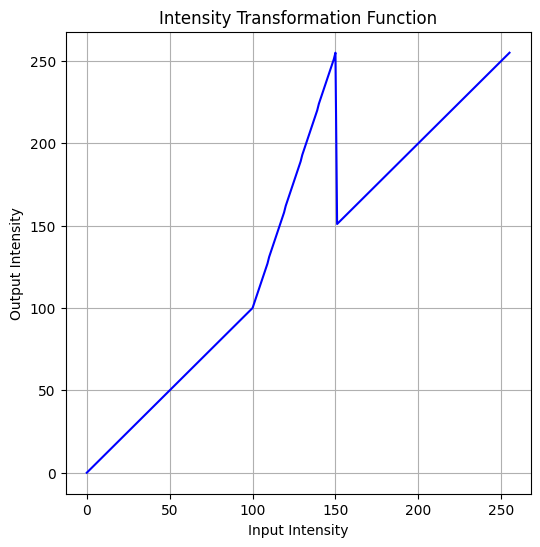

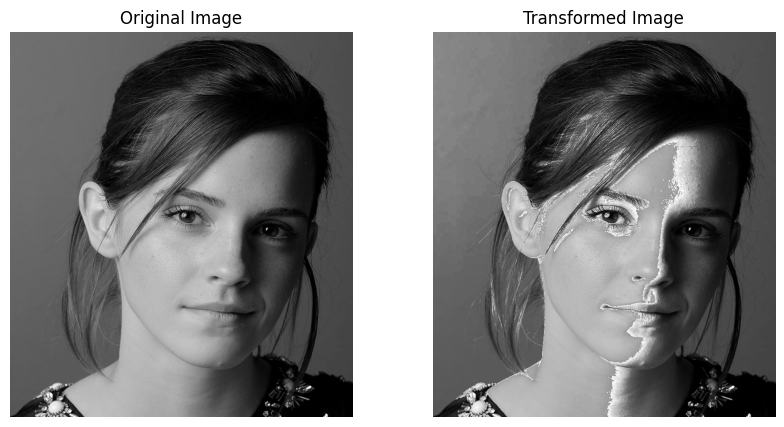

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img1 = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "Image not found."

# Define intensity transformation
def intensity_transform(img):
    table = np.zeros(256, dtype=np.uint8)
    for x in range(256):
        if x <= 50:
            table[x] = int((50/50) * x)  # Linear from 0 to 50
        elif x <= 100:
            table[x] = int(((100 - 50) / (100 - 50)) * (x - 50) + 50)  # 50→100 maps to 50→100
        elif x <= 150:
            table[x] = int(((255 - 100) / (150 - 100)) * (x - 100) + 100)  # 100→150 maps to 100→255
        else:
            table[x] = int(((255 - 150) / (255 - 150)) * (x - 150) + 150)  # 150→255 maps to 150→255
    return cv.LUT(img, table)
# Apply transformation
img1_transformed = intensity_transform(img1)

# Plot transformation curve
plt.figure(figsize=(6,6))
plt.plot(range(256), [intensity_transform(np.array([[i]], dtype=np.uint8))[0,0] for i in range(256)], 'b-')
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.show()

# Show images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img1_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()


